In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pyccl
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import math
import os

import sys
sys.path.append("./simulation_code/")
from simulate_des_maps import *

from coefficient import * 
from coefficient2 import * 
from threshold import * 

## Cells for Joe to run:

* **itr** is the number of iterations for fixed values (we settled on 100 for now)
* **b** is the number of points along the line perpendicular to the likelihood


### Testing Threshold (must run all 6 lines in one sitting)

(ensuring number of realisations or iterations is not less than half of the number of data points)

In [ ]:
# build maps
%time c_map_fixed,l_map_fixed,c_map,l_map,S_8 = threshold_sim(itr=100,nside=256,smoothing=20,b=10)

In [6]:
#%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=12,itr=100,nside=256,smoothing=20)  

In [7]:
#%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=14,itr=100,nside=256,smoothing=20)  

In [8]:
#%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=16,itr=100,nside=256,smoothing=20)  

In [ ]:
%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=18,itr=100,nside=256,smoothing=20)  

In [10]:
#%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=20,itr=100,nside=256,smoothing=20)  

In [13]:
# 60 data points, 100 realisations
%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=10,itr=100,nside=256,smoothing=20)  

In [14]:
# 120 data points, 100 realisations
%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=20,itr=100,nside=256,smoothing=20)

In [15]:
# 180 data points, 100 realisations
%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=30,itr=100,nside=256,smoothing=20)

In [16]:
# 240 data points, 120 realisations
%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=40,itr=100,nside=256,smoothing=20) #140

In [17]:
# 300 data points, 150 realisations
%time threshold_mf(c_map_fixed,l_map_fixed,c_map,l_map,S_8,thr_ct=50,itr=100,nside=256,smoothing=20) #160

#### do in one go

In [ ]:
%time threshold_all(itr=120,thr_ct=18,map_len=2)

### Testing Smoothing

In [ ]:
# optional - do it all in one go

smoothing_array = np.linspace(5,60,12,dtype=int)
smoothing_output = np.zeros(len(smoothing_array))

for index,s in enumerate(smoothing_array):
    %time smoothing_output[index] = coefficient(thr_ct=10, smoothing=s, nside=256, itr=100, b=10)
    
smoothing_output

In [12]:
%time coefficient_simplified(thr_ct=10, smoothing=5, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=10, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=15, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=20, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=25, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=30, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=35, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=40, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=45, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=50, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=55, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=60, nside=256, itr=100, b=10)

In [4]:
%time coefficient_simplified(thr_ct=20, smoothing=20, nside=256, itr=100, b=10)

In [5]:
%time coefficient_simplified(thr_ct=30, smoothing=20, nside=256, itr=100, b=10)

In [6]:
%time coefficient_simplified(thr_ct=40, smoothing=20, nside=256, itr=100, b=10)

In [7]:
%time coefficient_simplified(thr_ct=15, smoothing=20, nside=256, itr=100, b=10)

### Testing nside: 



In [ ]:
%time coefficient(thr_ct=10, smoothing=20, nside=256, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=20, nside=512, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=20, nside=1024, itr=100, b=10)

In [ ]:
%time coefficient(thr_ct=10, smoothing=20, nside=2048, itr=100, b=10)

---

#### Loading Data

In [12]:
## load saved data from coefficient file

# total number of pixels in the image
thr_ct = 10
nside = 256
smoothing=20

output_path = os.path.join(os.getcwd(), '2_Maps_Output')

# parent folder for input variable combination
path = os.path.join(output_path, f't{thr_ct}_n{nside}_s{smoothing}')

c = np.loadtxt(os.path.join(path,'c.out'))

# unable to load the maps - too much for my computer to handle
#c_map = np.loadtxt(os.path.join(path,'c_map.out'))
#l_map = np.loadtxt(os.path.join(path,'l_map.out'))

v_all_fixed = np.loadtxt(os.path.join(path, 'V_all_fixed.out'))
V_all = np.loadtxt(os.path.join(path, 'v_all_changing'))

'''
fixed_path = os.path.join(path, 'fixed')
v_fixed = np.loadtxt(os.path.join(fixed_path,'v.out'))
v0_fixed = np.loadtxt(os.path.join(fixed_path,'v0.out'))
v1_fixed = np.loadtxt(os.path.join(fixed_path,'v1.out'))
v2_fixed = np.loadtxt(os.path.join(fixed_path,'v2.out'))

changing_path = os.path.join(path, 'changing')
v = np.loadtxt(os.path.join(changing_path,'v.out'))
v_all = np.loadtxt(os.path.join(changing_path,'v_all.out'))'''

"\nfixed_path = os.path.join(path, 'fixed')\nv_fixed = np.loadtxt(os.path.join(fixed_path,'v.out'))\nv0_fixed = np.loadtxt(os.path.join(fixed_path,'v0.out'))\nv1_fixed = np.loadtxt(os.path.join(fixed_path,'v1.out'))\nv2_fixed = np.loadtxt(os.path.join(fixed_path,'v2.out'))\n\nchanging_path = os.path.join(path, 'changing')\nv = np.loadtxt(os.path.join(changing_path,'v.out'))\nv_all = np.loadtxt(os.path.join(changing_path,'v_all.out'))"

In [15]:
thr_ct = 18
nside = 256
smoothing=20
N = 12*nside*nside
map_len = 2
array_len = map_len*thr_ct*3
b=10
itr = 100

#load simplified data
output_path = os.path.join(os.getcwd(), '2_Maps_Output')
parent_path = os.path.join(output_path, 'cov_fix')

# parent folder for input variable combination
path = os.path.join(parent_path, f't{thr_ct}_n{nside}_s{smoothing}')


v_all_fixed = np.loadtxt(os.path.join(path, 'V_all_fixed.out'))
V_all = np.loadtxt(os.path.join(path, 'v_all_changing'))

---

# Individual Steps 

### 1. Calculate Mean and Covariance

In [22]:
## Simulation Variables
thr_ct = 10                    # threshold count
nside = 256                    # number of pixels on each side of the map
smoothing=20                    # map scale
N = 12*nside*nside             # total number of pixels

## Analysis Variables
itr = 100                        # number of iterations - rerun this bit 100 times (rerun with 270ish if there's time)
map_len = 2                    # sum of the number of lensing and clustering redshift bins
array_len = map_len*thr_ct*3   # length of covariance array - multiply by 3 for 3 MFs
b=10                           # number of points along likelihood perpendicular line

In [ ]:
# Fixed map run with iteration count
v_all_fixed = np.zeros((itr,array_len)) 
for i in range(itr):
    clustering_maps, lensing_maps = simulate_des_maps(0.3, 0.8, smoothing, nside,nmax=1)
    v_fixed, v0_fixed, v1_fixed, v2_fixed = calc_mf_2maps(clustering_maps[0],lensing_maps[0],thr_ct,N)
    v_all_fixed[i] = np.concatenate((v0_fixed.flatten(),v1_fixed.flatten(),v2_fixed.flatten()))
    print(i)

v_all_fixed.shape

(108, 108)


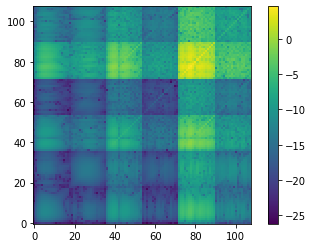

In [16]:
# covariance - should be 270x270
cov = np.cov((v_all_fixed.transpose()))
print(cov.shape)
plt.imshow(log(abs(cov)),origin='lower')
plt.colorbar();

In [17]:
# stack 100 iteration fixed variable versions of V0,V1,V2
v_all_mean = np.zeros(array_len)

for i in range(array_len):
    v_all_mean[i] = mean(v_all_fixed[:,i])
    
# mean array used in likelihood calculation    
v_all_mean.shape

(108,)

### 2. Run simulation for $\Omega_m$ and $\sigma_8$ values along likelihood perpendicular line, Calculate and Plot MFs

In [18]:
# points (get constants from plotting notebook)
omega_m = np.linspace(0.2,0.4,b)
sigma_8 = 0.8989639361571576*omega_m + 0.5303108191528527

S_8 = np.zeros(b)
for i in range(b):
    S_8[i] = sigma_8[i] * (omega_m[i]/0.3)**0.5329788249790618  

In [21]:
tic = time.perf_counter()

V_all = np.zeros((b,array_len))

for i in range(b):
    c_map, l_map = simulate_des_maps(omega_m[i], sigma_8[i], smoothing, nside, nmax=1)
    v, v0, v1, v2 = calc_mf_2maps(c_map[0],l_map[0],thr_ct,N)
    V_all[i] = np.concatenate((v0.flatten(),v1.flatten(),v2.flatten()))
    print(i)
    
toc = time.perf_counter()
print(round((toc - tic)/3600,2),'hrs')

V_all.shape

0
1
2
3
4
5
6
7
8
9
0.58 hrs


(10, 270)

### 3. Calculate Constraining Power

In [19]:
# singular matrix workaround - do we only want positive covariance values or just not = 0?
good = cov.diagonal() > 0
cov2 = cov[good][:, good]

# calculate the likelihood          
L = np.zeros(b)

N_ = itr-1           # number of realisations - 1
p = array_len        # number of data points

try:
    #inv_cov = np.linalg.inv(cov)
    inv_cov = ((N_)/(N_ - p - 1)) * np.linalg.inv(cov)
    for i in range(b):
        L[i] = -0.5 * (V_all[i] - v_all_mean) @ inv_cov @ (V_all[i] - v_all_mean)
except:
    #inv_cov2 = np.linalg.inv(cov2)
    inv_cov2 = ((N_)/(N_ - p - 1)) * np.linalg.inv(cov2)
    for i in range(b):
        d = (V_all[i] - v_all_mean)[good]
        L[i] = -0.5 * d @ inv_cov2 @ d
#finally:
#    print('sad')

L

array([-5.55784823e+17, -3.70789944e+17, -7.71759664e+16, -1.47057385e+17,
       -2.98151661e+15, -3.10680448e+16, -1.00521524e+17,  1.14557945e+17,
        5.07385404e+17,  1.35071465e+18])

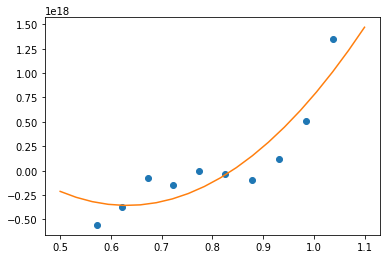

In [20]:
# fit a quadratic curve to L(S_8)

coefficient = np.polyfit(S_8,L,2)
poly = np.poly1d(coefficient)     
new_x = np.linspace(0.5,1.1,20)
new_y = poly(new_x)
plt.plot(S_8, L, "o", new_x, new_y);

In [51]:
constraining_power = sqrt(-1 / (2*coefficient[0]))
constraining_power

0.008894063394560347

In [14]:
# save data

# parent directory
output_path = os.path.join(os.getcwd(), '2_Maps_Output')
    
# path for given inputs
path = os.path.join(output_path, f't{thr_ct}_n{nside}_s{smoothing}')

try:
    os.mkdir(path) 
except:
    pass

#c = np.array((thr_ct,smoothing,nside,constraining_power))
#np.savetxt(os.path.join(path, 'c.out'),c)

# reformat maps into 2D to be able to save them
C_map = c_map.reshape((b*len(clustering_maps),N))
L_map = l_map.reshape((b*len(lensing_maps),N))
np.save(os.path.join(path, 'c_map'),C_map)
np.save(os.path.join(path, 'l_map'),L_map)

np.savetxt(os.path.join(path, 'V_all_fixed.out'),v_all_fixed)
np.savetxt(os.path.join(path, 'v_all_changing'),V_all)

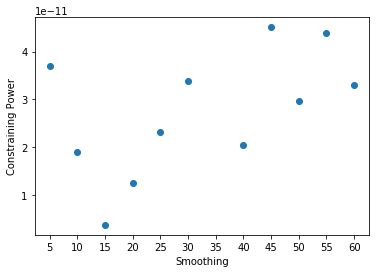

In [18]:
# plot smoothing vs. constraining power
smoothing_array = np.linspace(5,60,12)
thr_ct = 10
nside = 256
cp = np.zeros(len(smoothing_array))

# parent directory
output_path = os.path.join(os.getcwd(), '2_Maps_Output')
    
#for i in smoothing_array:
for i,smoothing in enumerate(smoothing_array):
    path = os.path.join(output_path, f't{thr_ct}_n{nside}_s{int(smoothing)}')
    output = np.loadtxt(os.path.join(path, 'c.out'))
    cp[i] = output[3]
    
plt.plot(smoothing_array,cp,'o')
plt.xlabel('Smoothing')
plt.xticks(smoothing_array)
plt.ylabel('Constraining Power');
plt.savefig('smoothing vs constraining power')

---

# Varying Threshold

#### Building the Maps (only need to do once)

In [5]:
## Simulation Variables
thr_ct_array = np.linspace(10,50,5,dtype=int) 
nside = 256                  
smoothing = 5                   
N = 12*nside*nside             

## Analysis Variables
itr = 10#100                        
map_len = 9                    
b=10      

In [6]:
# create fixed maps with iterations
c_map_fixed = np.zeros((itr,5,N)) 
l_map_fixed = np.zeros((itr,4,N))
    
for i in range(itr):
    c_map_fixed[i], l_map_fixed[i] = simulate_des_maps(0.3, 0.8, smoothing, nside)
    print(i)

0
1
2
3
4
5
6
7
8
9


In [7]:
# points (get constants from plotting notebook)
omega_m = np.linspace(0.2,0.4,b)
sigma_8 = 0.8989639361571576*omega_m + 0.5303108191528527

S_8 = np.zeros(b)
for i in range(b):
    S_8[i] = sigma_8[i] * (omega_m[i]/0.3)**0.5329788249790618  

In [8]:
# create maps with changing omega and sigma
c_map = np.zeros((b,5,N)) 
l_map = np.zeros((b,4,N))
    
for i in range(b):
    c_map[i], l_map[i] = simulate_des_maps(omega_m[i], sigma_8[i], smoothing, nside)

#### calc mfs

In [27]:
def setup_threshold_mf(itr):
    
    N = 12*nside*nside 
    
    # create fixed maps with iterations
    c_map_fixed = np.zeros((itr,5,N)) 
    l_map_fixed = np.zeros((itr,4,N))

    for i in range(itr):
        c_map_fixed[i], l_map_fixed[i] = simulate_des_maps(0.3, 0.8, smoothing, nside)
        print(i)
        
    # points (get constants from plotting notebook)
    omega_m = np.linspace(0.2,0.4,b)
    sigma_8 = 0.8989639361571576*omega_m + 0.5303108191528527

    S_8 = np.zeros(b)
    for i in range(b):
        S_8[i] = sigma_8[i] * (omega_m[i]/0.3)**0.5329788249790618  
        
    # create maps with changing omega and sigma
    c_map = np.zeros((b,5,N)) 
    l_map = np.zeros((b,4,N))

    for i in range(b):
        c_map[i], l_map[i] = simulate_des_maps(omega_m[i], sigma_8[i], smoothing, nside)
        print(i)
             
    return c_map_fixed,l_map_fixed,c_map,l_map,S_8


def threshold_mf(thr_ct,itr,c_map_fixed,l_map_fixed,c_map,l_map,S_8):
    
    array_len = map_len*thr_ct*3
    
    N = 12*nside*nside  

    ## fixed maps
    v_all_fixed = np.zeros((itr,array_len)) 
    for i in range(itr):
        v_fixed, v0_fixed, v1_fixed, v2_fixed = calc_mf_2maps(c_map_fixed[i],l_map_fixed[i],thr_ct,N)
        v_all_fixed[i] = np.concatenate((v0_fixed.flatten(),v1_fixed.flatten(),v2_fixed.flatten()))
        print(i)

    # stack 100 iteration fixed variable versions of V0,V1,V2
    v_all_mean = np.zeros(array_len)
    for i in range(array_len):
        v_all_mean[i] = mean(v_all_fixed[:,i])

    ## changing maps
    V_all = np.zeros((b,array_len))
    for i in range(b):
        v, v0, v1, v2 = calc_mf_2maps(c_map[i],l_map[i],thr_ct,N)
        V_all[i] = np.concatenate((v0.flatten(),v1.flatten(),v2.flatten()))
        print(i)    
       
    # covariance
    cov = np.cov((v_all_fixed.transpose()))

    # singular matrix workaround - do we only want positive covariance values or just not = 0?
    good = cov.diagonal() > 0
    cov2 = cov[good][:, good]

    # calculate the likelihood          
    L = np.zeros(b)

    try:
        inv_cov = np.linalg.inv(cov)
        for i in range(b):
            L[i] = -0.5 * (V_all[i] - v_all_mean) @ inv_cov @ (V_all[i] - v_all_mean)
    except:
        inv_cov2 = np.linalg.inv(cov2)
        for i in range(b):
            d = (V_all[i] - v_all_mean)[good]
            L[i] = -0.5 * d @ inv_cov2 @ d

    coefficient = np.polyfit(S_8,L,2)
    return sqrt(-1 / (2*coefficient[0]))

In [14]:
# save data by threshold range, nside, and smoothing
'''
output_path = os.path.join(os.getcwd(), '2_Maps_Output')

# parent folder for input variable combination
path = os.path.join(output_path, f't{thr_ct}_n{nside}_s{smoothing}')

try:
    os.mkdir(path) 
except:
    pass

np.savetxt(os.path.join(path, 'c_map.out'),clustering_maps)
np.savetxt(os.path.join(path, 'l_map.out'),lensing_maps)


np.savetxt(os.path.join(path, 'c.out'),c)


# save fixed parameter data that is used to find the mean and covariance
fixed_path = os.path.join(path, 'fixed')

try:
    os.mkdir(fixed_path)
except:
    pass

np.savetxt(os.path.join(fixed_path, 'v.out'),v_fixed)
np.savetxt(os.path.join(fixed_path, 'v0.out'),v0_fixed)
np.savetxt(os.path.join(fixed_path, 'v1.out'),v1_fixed)
np.savetxt(os.path.join(fixed_path, 'v2.out'),v2_fixed)


# save changing parameter data that is used to find the likelihood
changing_path = os.path.join(path, 'changing')

try:
    os.mkdir(changing_path)
except:
    pass

np.savetxt(os.path.join(changing_path, 'v.out'),v)
np.savetxt(os.path.join(changing_path, 'v_all.out'),v_all)
'''

"\n\nnp.savetxt(os.path.join(path, 'c.out'),c)\n\n\n# save fixed parameter data that is used to find the mean and covariance\nfixed_path = os.path.join(path, 'fixed')\n\ntry:\n    os.mkdir(fixed_path)\nexcept:\n    pass\n\nnp.savetxt(os.path.join(fixed_path, 'v.out'),v_fixed)\nnp.savetxt(os.path.join(fixed_path, 'v0.out'),v0_fixed)\nnp.savetxt(os.path.join(fixed_path, 'v1.out'),v1_fixed)\nnp.savetxt(os.path.join(fixed_path, 'v2.out'),v2_fixed)\n\n\n# save changing parameter data that is used to find the likelihood\nchanging_path = os.path.join(path, 'changing')\n\ntry:\n    os.mkdir(changing_path)\nexcept:\n    pass\n\nnp.savetxt(os.path.join(changing_path, 'v.out'),v)\nnp.savetxt(os.path.join(changing_path, 'v_all.out'),v_all)\n"

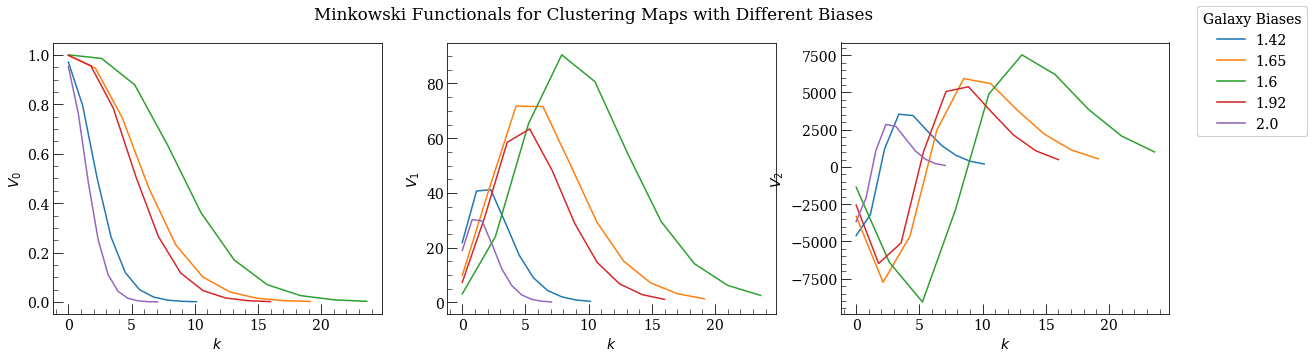

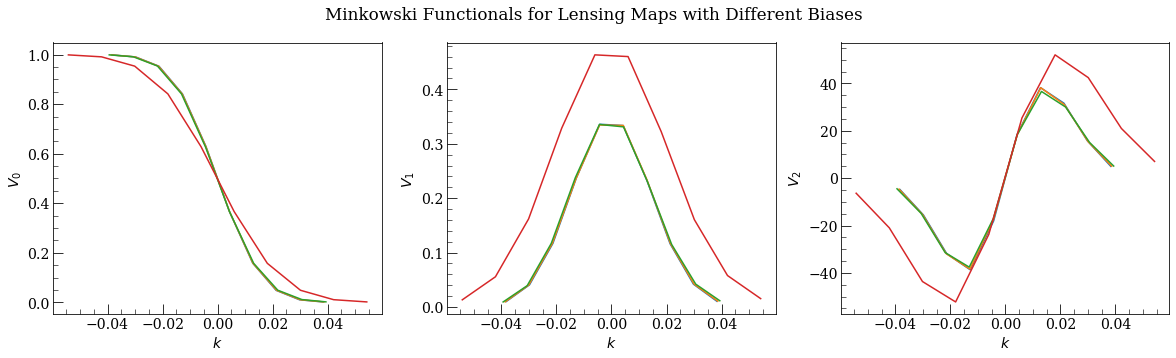

In [8]:
# plot MFs for clustering and lensing maps
from matplotlib import rcParams
rcParams['xtick.direction'] = 'in'
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.direction'] = 'in'
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.visible'] = True
rcParams['ytick.major.size'] = 10
rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 14

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle(('Minkowski Functionals for Clustering Maps with Different Biases'))
for i in range(0,5):
    ax1.plot(v_fixed[i],v0_fixed[i])
    ax1.set_xlabel('$k$')
    ax1.set_ylabel('$V_0$')
    ax2.plot(v_fixed[i],v1_fixed[i])
    ax2.set_xlabel('$k$')
    ax2.set_ylabel('$V_1$')
    ax3.plot(v_fixed[i],v2_fixed[i])
    ax3.set_xlabel('$k$')
    ax3.set_ylabel('$V_2$')
    fig.legend([1.42, 1.65, 1.60, 1.92, 2.00],title = 'Galaxy Biases') 
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle(('Minkowski Functionals for Lensing Maps with Different Biases'))
for i in range(5,9):
    ax1.plot(v_fixed[i],v0_fixed[i])
    ax1.set_xlabel('$k$')
    ax1.set_ylabel('$V_0$')
    ax2.plot(v_fixed[i],v1_fixed[i])
    ax2.set_xlabel('$k$')
    ax2.set_ylabel('$V_1$')
    ax3.plot(v_fixed[i],v2_fixed[i])
    ax3.set_xlabel('$k$')
    ax3.set_ylabel('$V_2$')
    # not sure how to label redshift bins here

In [13]:
# threshold one map

def thresh(itr,thr_ct,nside,smoothing,array_len,b):
    
    N = 12*nside*nside
    
    # fixed map iterations
    v_all_fixed = np.zeros((itr,array_len))
    for i in range(itr):
        c_map, l_map = simulate_des_maps(0.3, 0.8, smoothing, nside, nmax=1)
        v,v0,v1,v2 = calc_mf(l_map[0], thr_ct, N, is_clustering=False)
        v_all_fixed[i] = np.concatenate((v0,v1,v2))
        
    # fixed map mean    
    v_all_mean = np.zeros(array_len)
    for i in range(array_len):
            v_all_mean[i] = np.mean(v_all_fixed[:,i])
            
    # calculate S_8  
    omega_m = np.linspace(0.2,0.4,b)
    sigma_8 = 0.8989639361571576*omega_m + 0.5303108191528527
    S_8 = sigma_8 * (omega_m/0.3)**0.5329788249790618 
    
    # applying 10 S_8 values
    v_all = np.zeros((b,array_len))
    for i in range(b):
        c_map, l_map = simulate_des_maps(omega_m[i], sigma_8[i], smoothing, nside, nmax=1)
        v,v0,v1,v2 = calc_mf(l_map[0], thr_ct, N, is_clustering=False)
        v_all[i] = np.concatenate((v0,v1,v2))  

    # covariance
    cov = np.cov((v_all_fixed.transpose()))
    
    # singular covariance matrix workaround
    good = cov.diagonal() > 0
    cov2 = cov[good][:, good]

    # calculate the likelihood          
    L = np.zeros(b)
    N_ = itr-1           # number of realisations - 1
    p = array_len        # number of data points

    try:
        inv_cov = ((N_)/(N_ - p - 1)) * np.linalg.inv(cov)
        for i in range(b):
            L[i] = -0.5 * (v_all[i] - v_all_mean) @ inv_cov @ (v_all[i] - v_all_mean)
    except:
        inv_cov2 = ((N_)/(N_ - p - 1)) * np.linalg.inv(cov2)
        for i in range(b):
            d = (v_all[i] - v_all_mean)[good]
            L[i] = -0.5 * d @ inv_cov2 @ d
            
    
    coefficient = np.polyfit(S_8,L,2)
    constraining_power = np.sqrt(-1 / (2*coefficient[0]))
    
    # output array
    c = np.array((thr_ct,smoothing,nside,constraining_power))


    ## save data ##

    # parent directory
    output_path = os.path.join(os.getcwd(), '1_Map_Output')

    # save data in new subfolder
    sub_path = os.path.join(output_path, f't{thr_ct}_n{nside}_s{smoothing}')
    

    try:
        os.mkdir(sub_path) 
    except:
        pass

    np.savetxt(os.path.join(sub_path, 'c.out'),c)
    np.savetxt(os.path.join(sub_path, 'V_all_fixed.out'),v_all_fixed)
    np.savetxt(os.path.join(sub_path, 'v_all_changing'),v_all)

In [14]:
thr_ct=30
itr=100
nside=256
smoothing=20
map_len=1
array_len = map_len * thr_ct * 3 

thresh(itr,thr_ct,nside,smoothing,array_len,b=10)

In [15]:
thr_ct=40
array_len = map_len * thr_ct * 3 
thresh(itr,thr_ct,nside,smoothing,array_len,b=10)

In [17]:
thr_ct=50
array_len = map_len * thr_ct * 3 
thresh(itr,thr_ct,nside,smoothing,array_len,b=10)

### make map visualisations

In [9]:
c_map_v, l_map_v = simulate_des_maps(0.3, 0.8, 20, 512,nmax=1)

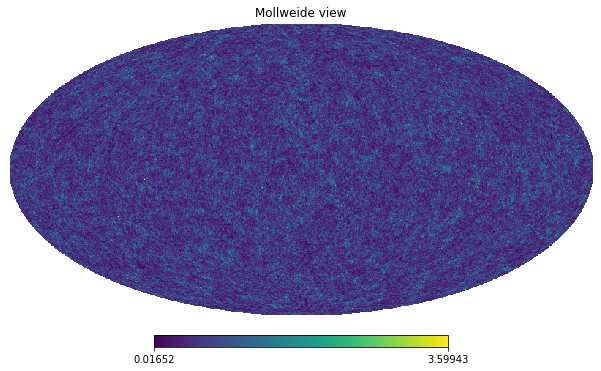

In [17]:
hp.mollview(c_map_v[0])

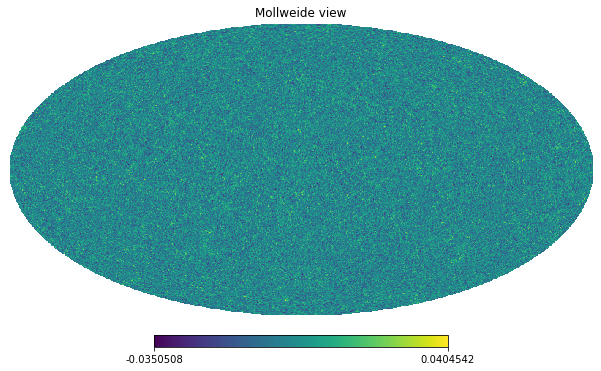

In [18]:
hp.mollview(l_map_v[0])